<a href="https://colab.research.google.com/github/panktishah62/Explainable-Artificial-Intelligence-XAI-/blob/master/XAI%20-%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Explainability: Exploratory Analysis and Visualization (Part 2)

As all of us know data visualization has been a major tool for learning meaningful information from data. A few such techniques can help to find the important characteristics and relevant manifestations of data. This can point us to what is potentially influential for the decision- making capacity of a model, which could be easily understood by humans.

Hence we have created a small module which contains :
- PCA
- t-SNE
- HeatMaps
- Variational autoencoders


Let's get started !!

We have used some libraries to make our work easier.

**matplotlib** : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.


**Numpy**: NumPy provides a high-performance multidimensional array object, and tools for working with these arrays. 

**Pandas**: Pandas help us to organize data and manipulate the data by putting it in a tabular form.

**Scikit Learn (sklearn)**: Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

**Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 


More examples can be found on our Github repositories.

https://github.com/panktishah62/Machine-Learning-and-Data-Science



# PCA and T- Sne 

Humans evolved to reason fluidly about two and three dimensions. With some effort, we may think in four dimensions. Machine learning often demands we work with thousands of dimensions – or tens of thousands, or millions! Even very simple things become hard to understand when you do them in very high numbers of dimensions.

 There is an entire, well-developed field, called dimensionality reduction, which explores techniques for translating high-dimensional data into lower dimensional data. 

These techniques are the basic building blocks we will need if we wish to visualize machine learning, and deep learning specifically. My hope is that, through visualization and observing more directly what is actually happening, we can understand neural networks in a much deeper and more direct way.

And so, the first thing on our agenda is to familiarize ourselves with dimensionality reduction. To do that, we’re going to need a dataset to test these techniques on.

This notebook is based on The [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py) example from scikit-learn website.

# What is PCA ?
The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, while retaining the variation present in the dataset, up to the maximum extent.

Principal Component Analysis can supply the user with a lower-dimensional picture, a projection or "shadow" of this object when viewed from its most informative viewpoint.

# What is t-SNE?
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

# Code

In [ ]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})                                                   #Set aesthetic parameters in one step.

PALETTE = sns.color_palette('deep', n_colors=3)                                           #Seaborn offers a function called color_palette,
CMAP = ListedColormap(PALETTE.as_hex())                                                   #which allows you to easily create new color_palettes for plots.

RANDOM_STATE = 42                                                                         #the random_state parameter is used for initializing the internal random number generator,
                                                                                          # which will decide the splitting of data into train and test indices.

In [ ]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']       #Declaring dimensions
target = 'species'
iris = pd.DataFrame(                                                            # Function to display data in tabular form.
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()                                                                     #Shows uppermost 5 data rows.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Defining plotting functions


Now we would like to visulaize the above mentioned multi- dimensional data into 2d form. Hence we create afunction for the same.

In [ ]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

# Plotting first two components

Now to get insight of how the data is with respect to 2 parameters we plot a 2d graph.

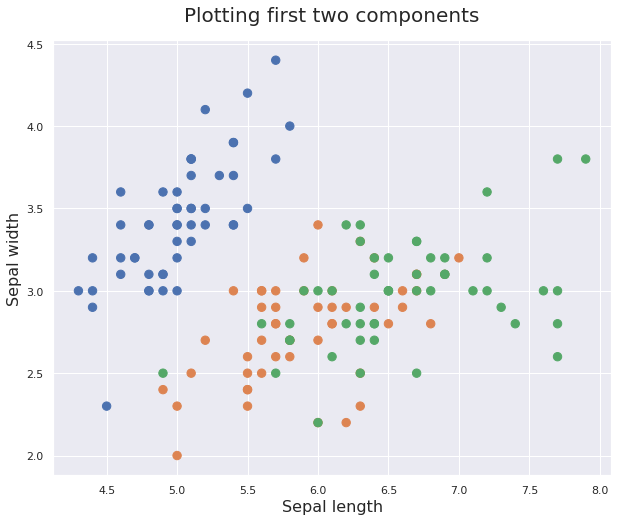

In [ ]:
plot_iris_2d( 
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

# 2D Plotting with PCA

 PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. 

Now let us analyze te above data with PCA algorithm.

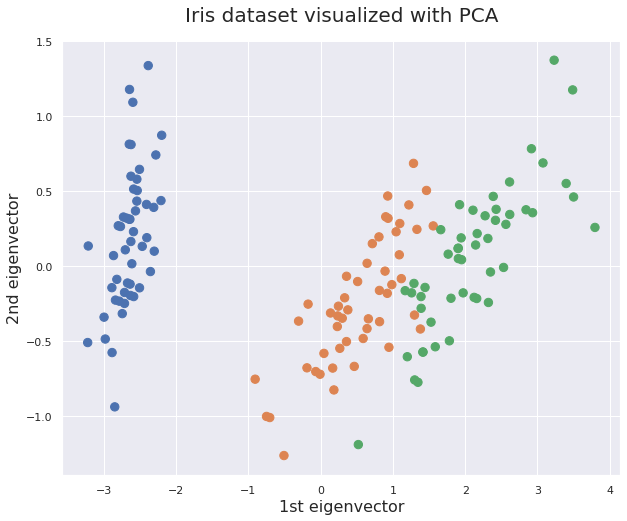

In [ ]:
pca = PCA(n_components=2)
points = pca.fit_transform(iris[features])

plot_iris_2d(
    x = points[:,0],
    y = points[:,1],
    title = 'Iris dataset visualized with PCA')

Here,  we observe that things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures.

 Think of a manifold structure as any geometric shape like: cylinder, ball, curve, etc.

# 2D plotting with t-SNE

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

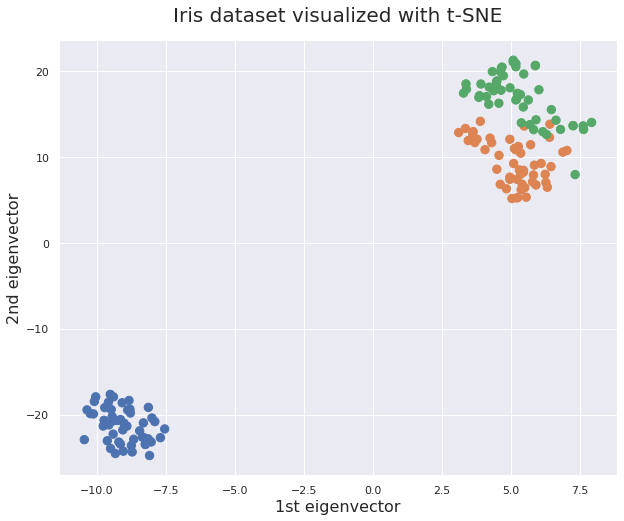

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

plot_iris_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'Iris dataset visualized with t-SNE')

t-SNE can often times show clear separation in the data. This can be used prior to using your segmentation model to select a cluster number or after to evaluate if your segments actually hold up. t-SNE however is not a clustering approach since it does not preserve the inputs like PCA and the values may often change between runs so it’s purely for exploration.

# Heat Maps

Heat maps are normally used to plot correlation between numeric columns in the form of a matrix. It is important to mention here that to draw matrix plots, you need to have meaningful information on rows as well as columns.One way to do this is to call the corr() method on the dataset. The corr() function returns the correlation between all the numeric columns of the dataset.

Heatmap essentially does is that it plots a box for every combination of rows and column value. The color of the box depends upon the gradient.

For example taking planets dataset from sns datasets we can create heat map given bellow:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

dataset = sns.load_dataset('planets')                                           #planets dataset form sns datasets 
dataset

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
dataset.corr()                                                                  #correlation matrix can be given as

,number,orbital_period,mass,distance,year
number,1.000000,-0.012570,-0.241429,-0.033638,0.147849
orbital_period,-0.012570,1.000000,0.173725,-0.034365,-0.032333
mass,-0.241429,0.173725,1.000000,0.274082,-0.123787
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.147849,-0.032333,-0.123787,0.178922,1.000000


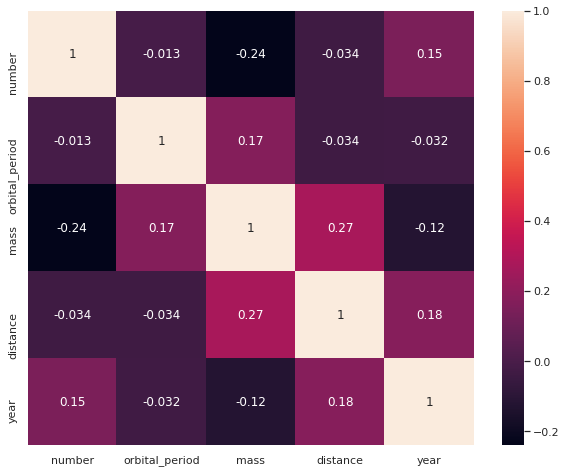

In [ ]:
corr = dataset.corr()
sns.heatmap(corr,annot=True)                                                    #gives heatmap using correlation matrix and the values inside each box shows the correlation between corresponding row and column

we can also use pivot_table function to specify the index, the column and the values that you want to see corresponding to the index and the columns.

Now using the pivot_table function, we can create a heat map that displays the number of passengers that traveled in a specific month of a specific year.

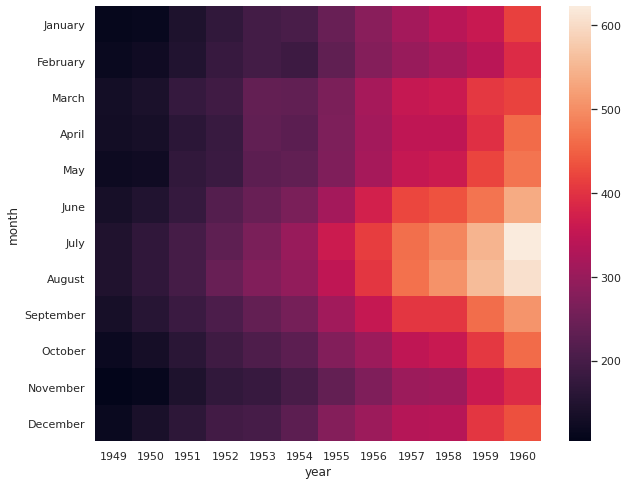

In [ ]:
dataset1 = sns.load_dataset('flights')

data = dataset1.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(data)

It is evident from the output that in the early years the number of passengers who took the flights was less. As the years progress, the number of passengers increases.

# Variational Auto-Encoder

## Autoancoders:

An autoencoder network is actually a pair of two connected networks, an encoder and a decoder. An encoder network takes in an input, and converts it into a smaller, dense representation, which the decoder network can use to convert it back to the original input.

Encoder is simply is a network that takes in an input and produces a much smaller representation (the encoding), that contains enough information for the next part of the network to process it into the desired output format.

Autoencoders take this idea, and slightly flip it on its head, by making the encoder generate encodings specifically useful for reconstructing its own input.

## VAE:

Variational Autoencoders (VAEs) have one fundamentally unique property that separates them from autoencoders, and it is this property that makes them so useful for generative modeling: their latent spaces are, by design, continuous, allowing easy random sampling and interpolation.

It achieves this by doing something that seems rather surprising at first: making its encoder not output an encoding vector of size n, rather, outputting two vectors of size n: a vector of means, μ, and another vector of standard deviations, σ.

They form the parameters of a vector of random variables of length n, with the i th element of μ and σ being the mean and standard deviation of the i th random variable, X i, from which we sample, to obtain the sampled encoding which we pass onward to the decoder.
Then the sample is passed to other dense layers and output is obtained.

Here we have taken an example of fachine_mnist dataset from keras.

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 114us/step - loss: 304.0784 - val_loss: 282.9179
Epoch 2/50
60000/60000 [==============================] - 6s 105us/step - loss: 278.1475 - val_loss: 275.8161
Epoch 3/50
60000/60000 [==============================] - 6s 104us/step - loss: 273.7911 - val_loss: 274.3714
Epoch 4/50
60000/60000 [==============================] - 6s 106us/step - loss: 271.9267 - val_loss: 272.4540
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 270.6829 - val_loss: 270.6969
Epoch 6/50
60000/60000 [==============================] - 6s 99us/step - loss: 269.7256 - val_loss: 270.4153
Epoch 7/50
60000/60000 [==============================] - 6s 99us/step - loss: 268.8239 - val_loss: 269.5064
Epoch 8/50
60000/60000 [==============================] - 6s 99us/step - loss: 268.1554 - val_loss: 268.1578
Epoch 9/50

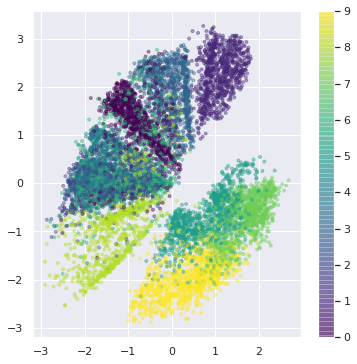

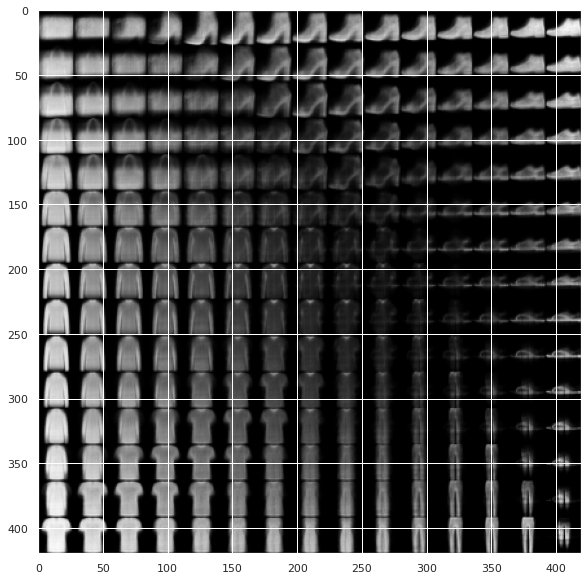

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
 
from keras import backend as K
 
from keras.layers import Input, Dense, Lambda, Layer, Add, Multiply
from keras.models import Model, Sequential
from keras.datasets import fashion_mnist
 
original_dim = 28*28
intermediate_dim = 256
latent_dim = 2
batch_size = 100
epochs = 50
epsilon_std = 1.0
 
 
#now define the negative log likelihood of a Bernoulli , which is in fact equivalent to the binary cross-entropy loss:
def nll(y_true, y_pred):
    """ Negative log likelihood (Bernoulli). """
 
    # keras.losses.binary_crossentropy gives the mean
    # over the last axis. we require the sum
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)
 
#We define an auxiliary custom Keras layer which takes mu and log_var as input and simply returns them as output without modification. We do however explicitly introduce the side-effect of calculating the KL divergence and adding it to a collection of losses, by calling the method add_loss
class KLDivergenceLayer(Layer):
 
    """ Identity transform layer that adds KL divergence
    to the final model loss.
    """
 
    def __init__(self, *args, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(*args, **kwargs)
 
    def call(self, inputs):
 
        mu, log_var = inputs
 
        kl_batch = - .5 * K.sum(1 + log_var -
                                K.square(mu) -
                                K.exp(log_var), axis=-1)
 
        self.add_loss(K.mean(kl_batch), inputs=inputs)
 
        return inputs
 
 #here the decoder is implemented using Sequential model API
decoder = Sequential([
    Dense(intermediate_dim, input_dim=latent_dim, activation='relu'),
    Dense(original_dim, activation='sigmoid')
])
 
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
 
z_mu = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)
 
#feeding z_mu and z_log_var through this layer
z_mu, z_log_var = KLDivergenceLayer()([z_mu, z_log_var])
z_sigma = Lambda(lambda t: K.exp(.5*t))(z_log_var)
 
eps = Input(tensor=K.random_normal(stddev=epsilon_std,
                                   shape=(K.shape(x)[0], latent_dim)))
z_eps = Multiply()([z_sigma, eps])
z = Add()([z_mu, z_eps])
 
x_pred = decoder(z)
 
vae = Model(inputs=[x, eps], outputs=x_pred)
vae.compile(optimizer='rmsprop', loss=nll)
 
# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, original_dim) / 255.
x_test = x_test.reshape(-1, original_dim) / 255.
 
vae.fit(x_train,
        x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))
 
encoder = Model(x, z_mu)
 
# display a 2D plot of the digit classes in the latent space
z_test = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(z_test[:, 0], z_test[:, 1], c=y_test,
            alpha=.4, s=3**2, cmap='viridis')
plt.colorbar()
plt.show()
 
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
 
# linearly spaced coordinates on the unit square were transformed
# through the inverse CDF (ppf) of the Gaussian to produce values
# of the latent variables z, since the prior of the latent space
# is Gaussian
u_grid = np.dstack(np.meshgrid(np.linspace(0.05, 0.95, n),
                               np.linspace(0.05, 0.95, n)))
z_grid = norm.ppf(u_grid)
x_decoded = decoder.predict(z_grid.reshape(n*n, 2))
x_decoded = x_decoded.reshape(n, n, digit_size, digit_size)
 
plt.figure(figsize=(10, 10))
plt.imshow(np.block(list(map(list, x_decoded))), cmap='gray')
plt.show()